In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Import datasets

cols = ["constituency_name","region_name","electorate","valid_votes","turnout","con","lab","ld","brexit","green","snp","pc","dup","sf","sdlp","uup","alliance","other","other_winner","18-24","25-34","35-44","45-54","55-64","65+"]
uk_data = pd.read_csv("percentage_data.data", names = cols)

uk_data.head()

,constituency_name,region_name,electorate,valid_votes,turnout,con,lab,ld,brexit,green,...,uup,alliance,other,other_winner,18-24,25-34,35-44,45-54,55-64,65+
0,Aberavon,Wales,50750,31598,0.622621,0.206279,0.538262,0.033926,0.098361,0.014241,...,0.0,0.0,0.023134,0.0,0.109197,0.160235,0.157987,0.159947,0.168921,0.243715
1,Aberconwy,Wales,44699,31865,0.712879,0.460913,0.397081,0.057147,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.080732,0.122583,0.119593,0.161403,0.183528,0.332161
2,Aberdeen North,Scotland,62489,37413,0.598713,0.201401,0.132013,0.076070,0.026943,0.023521,...,0.0,0.0,0.000000,0.0,0.175505,0.256129,0.190318,0.155881,0.142640,0.079526
3,Aberdeen South,Scotland,65719,45638,0.694441,0.359306,0.084009,0.109952,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.093194,0.248264,0.221135,0.177006,0.172687,0.087714
4,Airdrie and Shotts,Scotland,64011,39772,0.621331,0.176280,0.320024,0.035678,0.000000,0.017223,...,0.0,0.0,0.000000,0.0,0.115947,0.182063,0.187704,0.205865,0.202400,0.106021


In [ ]:
#Transform data to catagorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

uk_data[['constituency_name', 'region_name']] = uk_data[['constituency_name', 'region_name']].apply(LabelEncoder().fit_transform)


In [ ]:
uk_data.head()

,constituency_name,region_name,electorate,valid_votes,turnout,con,lab,ld,brexit,green,...,alliance,other,other_winner,18-24,25-34,35-44,45-54,55-64,65+,age_cat
0,0,9,50750,31598,0.622621,0.206279,0.538262,0.033926,0.098361,0.014241,...,0.0,0.023134,0.0,0.109197,0.160235,0.157987,0.159947,0.168921,0.243715,3
1,1,9,44699,31865,0.712879,0.460913,0.397081,0.057147,0.000000,0.000000,...,0.0,0.000000,0.0,0.080732,0.122583,0.119593,0.161403,0.183528,0.332161,0
2,2,6,62489,37413,0.598713,0.201401,0.132013,0.076070,0.026943,0.023521,...,0.0,0.000000,0.0,0.175505,0.256129,0.190318,0.155881,0.142640,0.079526,4
3,3,6,65719,45638,0.694441,0.359306,0.084009,0.109952,0.000000,0.000000,...,0.0,0.000000,0.0,0.093194,0.248264,0.221135,0.177006,0.172687,0.087714,4
4,4,6,64011,39772,0.621331,0.176280,0.320024,0.035678,0.000000,0.017223,...,0.0,0.000000,0.0,0.115947,0.182063,0.187704,0.205865,0.202400,0.106021,1


In [ ]:
#Try k-means clustering algorithm

from sklearn.cluster import k_means

In [ ]:
#Want to see correlations between all parties

parties = ["con", "lab", "ld", "brexit", "green", "snp"]
for party_1 in parties:
    for party_2 in parties:
        if party_1 != party_2:
            party_data = uk_data[[party_1, party_2]].values
            plt.scatter(
                party_data[:, 0], party_data[:, 1],
                c='white', marker='o',
                edgecolor='black', s=50
                )
            #plt.xlabel(party_1)
            #plt.ylabel(party_2)
            plt.title(party_1 + " vs " + party_2)
            plt.show()

In [ ]:
from sklearn.cluster import KMeans

party_data = uk_data[parties].values

km = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(party_data)

In [ ]:
#Clustering using age bracket data

ages = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
age_data = uk_data[ages].values

age_means = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_age_means = age_means.fit_predict(age_data)


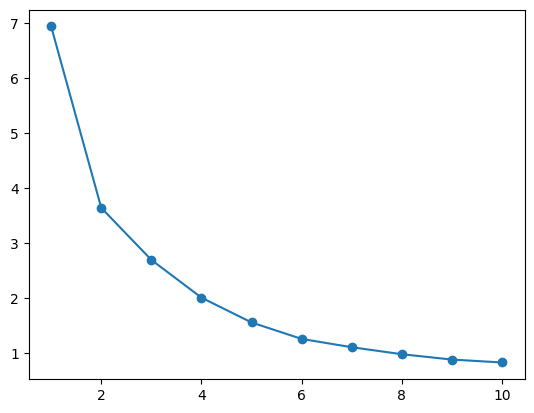

In [ ]:
#Find distortions
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(age_data)
    distortions.append(km.inertia_)


plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Distortion')
plt.show()

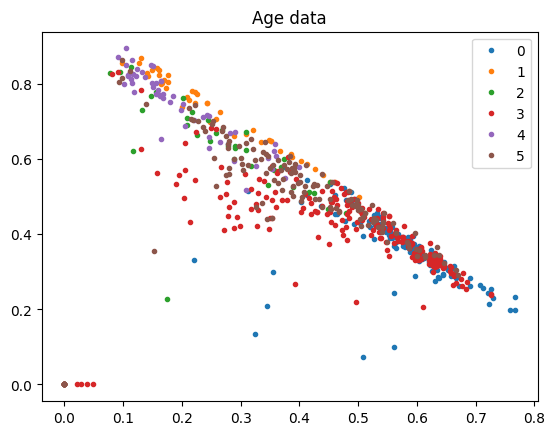

In [ ]:
#Create age categories
uk_data["age_cat"] = y_age_means

groups = uk_data.groupby('age_cat')
for name, group in groups:
    plt.plot(group["con"], group["ld"] + group["lab"] + group["snp"], marker='o', linestyle='', markersize=3, label=name)

plt.title("Age data")
plt.legend()
plt.show()


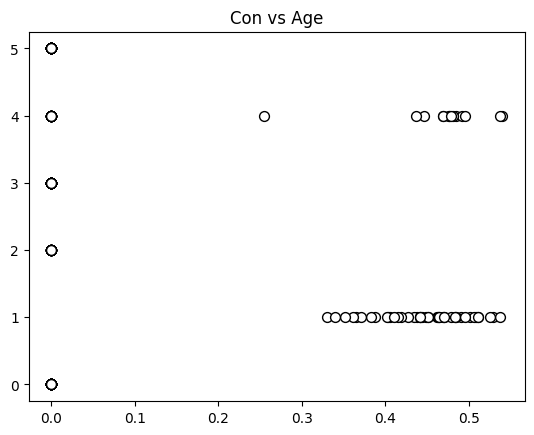

In [ ]:
#Try for parties
#TODO: specify SNP/PC for Scotland/Wales only
test_data = uk_data[["snp", "age_cat"]].values

plt.scatter(
    test_data[:, 0], test_data[:, 1],
    c='white', marker='o',
    edgecolor='black', s=50)
plt.title("Con vs Age")
plt.show()

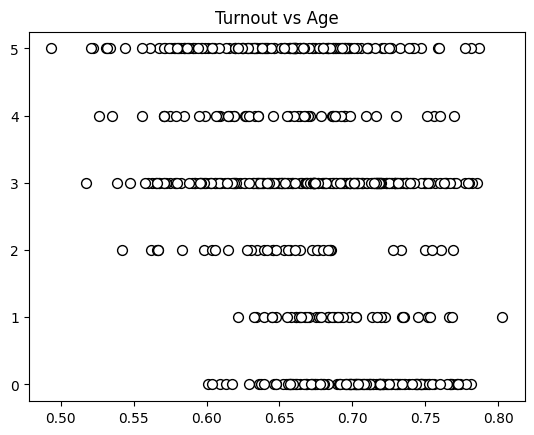

In [ ]:
test_data = uk_data[["turnout", "age_cat"]].values

plt.scatter(
    test_data[:, 0], test_data[:, 1],
    c='white', marker='o',
    edgecolor='black', s=50)
plt.title("Turnout vs Age")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np


In [ ]:
#TODO: Bit messy. Would rather make it clear which region is which
eng_data = uk_data[uk_data.region_name != 5 | 6 | 9]

In [ ]:

train, valid, test = np.split(eng_data.sample(frac=1), [int(0.6*len(eng_data)), int(0.8*len(eng_data))])


In [ ]:
xlabels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
y_train = train["lab"].values.reshape(-1,1)
X_train = train[xlabels].values

y_test = test["lab"].values.reshape(-1,1)
X_test = test[xlabels].values

In [ ]:
#Attempt to fit linear model to the Labour vote

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Need to adjust parameters drastically - this is not a particularly good model
model_1.score(X_test, y_test)

0.4240321147079783